# Regression Task

This notebook demonstrates a regression task using machine learning. This is a simple demonstration of regression neural network in PyTorch using a single hidden layer, one output layer and one hidden layer. The polynomials to be learnt are:

1) 2x^2 + 4x + 2
2) 4x^2 + 4x + 10 

raghudiddigi@gmail.com

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [25]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.hidden = nn.Linear(1, 64)  # One hidden layer with 10 neurons
        self.relu = nn.ReLU()
        self.output = nn.Linear(64, 1)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x


In [26]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, x, y):   
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [27]:
def custom_loss(model, criterion, outputs, y_data, old_params, param_importance, lambda_reg):
    normal_loss = criterion(outputs, y_data)
    reg_loss = 0.0
    for name, param in model.named_parameters():
        if param.requires_grad:
            reg_loss += torch.sum(param_importance[name] * (param - old_params[name]) ** 2)
    
    total_loss = normal_loss + lambda_reg * reg_loss
    return total_loss


In [28]:
np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
y = 2 * x**2 + 4 * x + 2
parameter_importance = {}
new_weights = {}
old_weights = {}

# Convert data to PyTorch tensors
x_train_1 = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Shape: (5000, 1)
y_train_1 = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Shape: (500, 1)

dataset = CustomDataset(x_train_1, y_train_1)

dataloader_1 =DataLoader(dataset, batch_size=32, shuffle=True)  


In [29]:
def train_model(model,x_train,y_train,num_epochs,optimizer,device):
    losses = []
    global new_weights
    global old_weights
    old_weights = new_weights
    criterion = nn.MSELoss()
    for epoch in range(num_epochs):
    # Forward pass
        outputs = model(x_train.to(device))
        loss = criterion(outputs, y_train.to(device))

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if (epoch + 1) % 1000 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
            print()
    
    new_weights = {name: param.clone().detach() for name, param in model.named_parameters()}
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()


In [30]:
def train_model_with_custom_loss(model,x_train,y_train,num_epochs,optimizer,device):
    losses = []
    global new_weights
    global old_weights
    old_weights = new_weights
    for epoch in range(num_epochs):
    # Forward pass
        outputs = model(x_train.to(device))
        loss = custom_loss(model,nn.MSELoss(),outputs,y_train.to(device),old_weights,parameter_importance,100)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if (epoch + 1) % 1000 == 0:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")
            print()
    
    new_weights = {name: param.clone().detach() for name, param in model.named_parameters()}
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

cuda
Epoch [1000/20000], Loss: 526.0078

Epoch [2000/20000], Loss: 322.1258

Epoch [3000/20000], Loss: 167.8211

Epoch [4000/20000], Loss: 79.8967

Epoch [5000/20000], Loss: 39.8621

Epoch [6000/20000], Loss: 17.6901

Epoch [7000/20000], Loss: 6.9159

Epoch [8000/20000], Loss: 2.6812

Epoch [9000/20000], Loss: 1.0031

Epoch [10000/20000], Loss: 0.3494

Epoch [11000/20000], Loss: 0.1284

Epoch [12000/20000], Loss: 0.0543

Epoch [13000/20000], Loss: 0.0228

Epoch [14000/20000], Loss: 0.0097

Epoch [15000/20000], Loss: 0.0045

Epoch [16000/20000], Loss: 0.0024

Epoch [17000/20000], Loss: 0.0013

Epoch [18000/20000], Loss: 0.0009

Epoch [19000/20000], Loss: 0.0010

Epoch [20000/20000], Loss: 0.0007



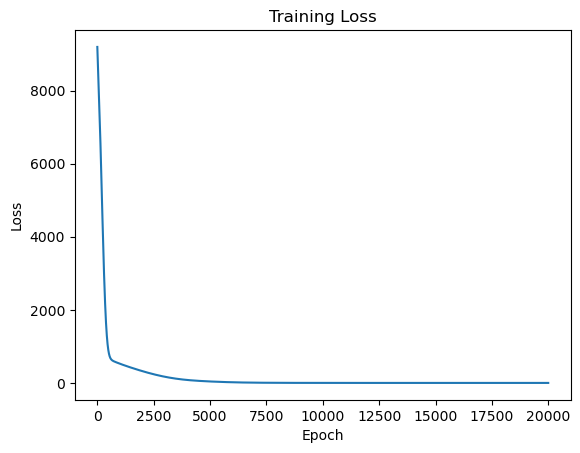

In [31]:
model_1 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_1.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)

# Train the model_1
num_epochs = 20000
train_model(model_1,x_train_1,y_train_1,num_epochs,optimizer,device)

# Save the trained model
torch.save(model_1.state_dict(), "model_1.pth")

cuda
Epoch [1000/20000], Loss: 2114.8616

Epoch [2000/20000], Loss: 1563.4078

Epoch [3000/20000], Loss: 1089.1130

Epoch [4000/20000], Loss: 684.2902

Epoch [5000/20000], Loss: 396.9283

Epoch [6000/20000], Loss: 222.2081

Epoch [7000/20000], Loss: 106.0918

Epoch [8000/20000], Loss: 44.4201

Epoch [9000/20000], Loss: 18.2074

Epoch [10000/20000], Loss: 6.8366

Epoch [11000/20000], Loss: 2.2369

Epoch [12000/20000], Loss: 0.7740

Epoch [13000/20000], Loss: 0.3155

Epoch [14000/20000], Loss: 0.1347

Epoch [15000/20000], Loss: 0.0574

Epoch [16000/20000], Loss: 0.0256

Epoch [17000/20000], Loss: 0.0114

Epoch [18000/20000], Loss: 0.0058

Epoch [19000/20000], Loss: 0.0037

Epoch [20000/20000], Loss: 0.0026



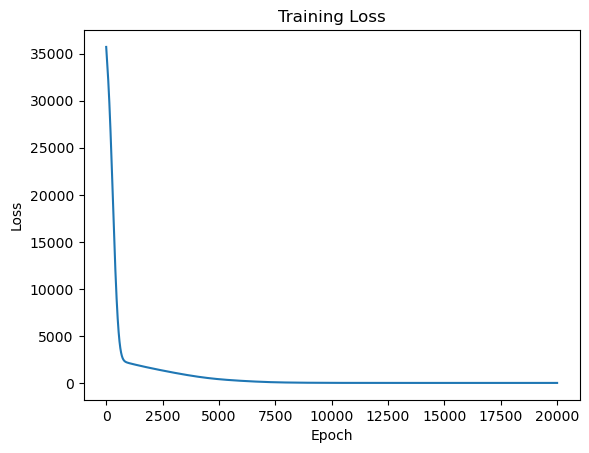

In [32]:
np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
y = 4 * x**2 + 4 * x + 10

# Convert data to PyTorch tensors
x_train_2 = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Shape: (5000, 1)
y_train_2 = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Shape: (500, 1)

dataset = CustomDataset(x_train_2, y_train_2)

dataloader_2 =DataLoader(dataset, batch_size=32, shuffle=True)

model_2 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_2.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)

# Train the model_2
num_epochs = 20000
train_model(model_2,x_train_2,y_train_2,num_epochs,optimizer,device)
torch.save(model_2.state_dict(), "model_2.pth")


cuda
Epoch [1000/20000], Loss: 6305.4810

Epoch [2000/20000], Loss: 4236.9121

Epoch [3000/20000], Loss: 3218.0376

Epoch [4000/20000], Loss: 2272.4971

Epoch [5000/20000], Loss: 1458.1614

Epoch [6000/20000], Loss: 877.8735

Epoch [7000/20000], Loss: 520.3518

Epoch [8000/20000], Loss: 278.9415

Epoch [9000/20000], Loss: 140.9442

Epoch [10000/20000], Loss: 65.1281

Epoch [11000/20000], Loss: 27.4094

Epoch [12000/20000], Loss: 10.6941

Epoch [13000/20000], Loss: 3.9376

Epoch [14000/20000], Loss: 1.3991

Epoch [15000/20000], Loss: 0.5774

Epoch [16000/20000], Loss: 0.2448

Epoch [17000/20000], Loss: 0.1039

Epoch [18000/20000], Loss: 0.0491

Epoch [19000/20000], Loss: 0.0271

Epoch [20000/20000], Loss: 0.0144



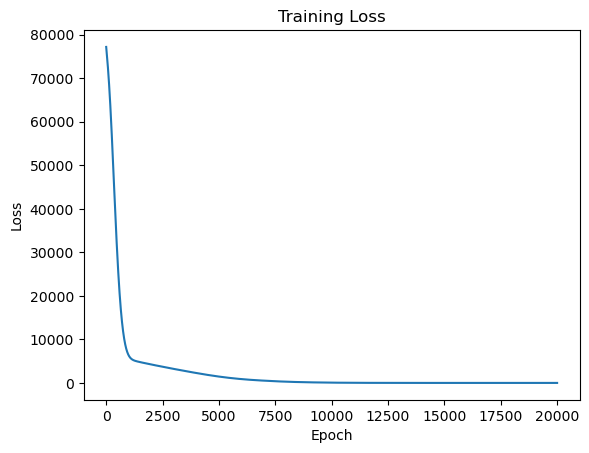

In [33]:
np.random.seed(42)
x = np.random.uniform(-10, 10, 1000)
y = 6 * x**2 + 7 * x + 9

# Convert data to PyTorch tensors
x_train_3 = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Shape: (5000, 1)
y_train_3 = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Shape: (500, 1)

dataset = CustomDataset(x_train_3, y_train_3)
dataloader_3 =DataLoader(dataset, batch_size=32, shuffle=True)

model_3 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model_3.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_3.parameters(), lr=0.001)

# Train the model_3
num_epochs = 20000

train_model(model_3,x_train_3,y_train_3,num_epochs,optimizer,device)
torch.save(model_3.state_dict(), "model_3.pth")

In [34]:
def calculate_importance_weights(model, x_data, y_data, parameter_importance):
    x_data = x_data.to(device)
    y_data = y_data.to(device)
    model.to(device)

    outputs = model(x_data)
    loss = criterion(outputs, y_data)

    optimizer.zero_grad()

    loss.backward()
    for name, param in model.named_parameters():
        if param.grad is not None:
            if name in parameter_importance:
                parameter_importance[name] += abs(param.grad.clone().detach())
            else:
                parameter_importance[name] = abs(param.grad.clone().detach())
    
    return parameter_importance


In [35]:
def update_param_importance(dataloader):
    for batch in dataloader:
        x_data, y_data = batch
        global parameter_importance
        parameter_importance = calculate_importance_weights(model_4, x_data, y_data, parameter_importance)

    for keys,values in parameter_importance.items():
        values = values/len(dataloader)

    print(parameter_importance)

In [36]:
def get_predict_data(x_train_1, y_train_1, x_train_2, y_train_2, x_train_3, y_train_3):

    # Initialize x_test and y_test
    x_test = torch.tensor([])
    y_test = torch.tensor([])

    # Randomly sample 200 samples
    indices = torch.randperm(x_train_1.size(0))[:200]

    x_sample = x_train_1[indices]
    y_sample = y_train_1[indices]

    # Append to x_test and y_test
    x_test = torch.cat((x_test, x_sample))
    y_test = torch.cat((y_test, y_sample))

    indices = torch.randperm(x_train_2.size(0))[:200]

    x_sample = x_train_2[indices]
    y_sample = y_train_2[indices]  

    x_test = torch.cat((x_test, x_sample))
    y_test = torch.cat((y_test, y_sample))

    indices = torch.randperm(x_train_3.size(0))[:200]

    x_sample = x_train_3[indices]
    y_sample = y_train_3[indices]  

    x_test = torch.cat((x_test, x_sample))
    y_test = torch.cat((y_test, y_sample))
    
    return x_test, y_test

In [37]:
# plt.figure(figsize=(10, 6))
# plt.scatter(x_test.cpu().numpy(), y_test.cpu().numpy(), label="Original Data", color="blue", alpha=0.6)

def evaluate_all(x_test, y_test, model_1, model_2, model_3, model_4):

    model_4.eval()

    x_test = x_test.to(device)
    y_test = y_test.to(device)
    model_4.to(device)

    outputs = model_4(x_test)

    outputs_1 = model_1(x_test)
    outputs_2 = model_2(x_test)
    outputs_3 = model_3(x_test)

    y_pred_1 = outputs_1.detach().cpu().numpy()
    y_pred_2 = outputs_2.detach().cpu().numpy()
    y_pred_3 = outputs_3.detach().cpu().numpy()
    y_pred_4 = outputs.detach().cpu().numpy()

    return y_pred_1, y_pred_2, y_pred_3, y_pred_4

In [38]:
def plot_preds(x_test, y_test, y_pred_1, y_pred_2, y_pred_3, y_pred_4):

    plt.figure(figsize=(10, 6))

    # Scatter plot for original data
    plt.scatter(x_test.cpu().numpy(), y_test.cpu().numpy(), label="Original Data", color="blue", alpha=0.6)

    # Model predictions - Use scatter instead of plot
    plt.scatter(x_test.cpu().numpy(), y_pred_1, label="Model 1 Prediction", color="red", alpha=0.6)
    plt.scatter(x_test.cpu().numpy(), y_pred_2, label="Model 2 Prediction", color="green", alpha=0.6)
    plt.scatter(x_test.cpu().numpy(), y_pred_3, label="Model 3 Prediction", color="orange", alpha=0.6)
    plt.scatter(x_test.cpu().numpy(), y_pred_4, label="Model 4 Prediction", color="purple", alpha=0.6)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Model Predictions vs Original Data")
    plt.show()


    # Calculating Mean Squared Error for each model
    mse_1 = np.mean((y_pred_1 - y_test.cpu().numpy())**2)
    mse_2 = np.mean((y_pred_2 - y_test.cpu().numpy())**2)
    mse_3 = np.mean((y_pred_3 - y_test.cpu().numpy())**2)
    mse_4 = np.mean((y_pred_4 - y_test.cpu().numpy())**2)

    print(f"Model 1 MSE: {mse_1:.4f}")
    print(f"Model 2 MSE: {mse_2:.4f}")
    print(f"Model 3 MSE: {mse_3:.4f}")
    print(f"Model 4 MSE: {mse_4:.4f}")

In [39]:
def plot_preds_new(x_test, y_test, y_pred_1, y_pred_2, y_pred_3, y_pred_4):

    fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
    axes = axes.flatten()

    models = [
        (y_pred_1, "Model 1 Prediction", "red"),
        (y_pred_2, "Model 2 Prediction", "green"),
        (y_pred_3, "Model 3 Prediction", "orange"),
        (y_pred_4, "Model 4 Prediction", "purple"),
    ]

    x_vals = x_test.cpu().numpy()
    y_vals = y_test.cpu().numpy()
    y_avg = 4 * x_vals**2 + 5 * x_vals + 7  # Defined function

    for i, (y_pred, title, color) in enumerate(models):
        axes[i].scatter(x_vals, y_vals, label="Original Data", color="blue", alpha=0.6)
        axes[i].scatter(x_vals, y_pred, label=title, color=color)
        axes[i].scatter(x_vals, y_avg, label="y_avg Function", color="pink")  # Added y_avg
        axes[i].set_title(title)
        axes[i].legend()
        axes[i].set_xlabel("x")
        axes[i].set_ylabel("y")

    plt.suptitle("Model Predictions vs Original Data (Including y_avg)")
    plt.tight_layout()
    plt.show()

In [40]:
model_4 = RegressionModel()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model_4.to(device)
print(device)
# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_4.parameters(), lr=0.001)

# Train the model_2
num_epochs = 20000

cuda


In [41]:
x_test, y_test = get_predict_data(x_train_1, y_train_1, x_train_2, y_train_2, x_train_3, y_train_3)

Epoch [1000/20000], Loss: 497.3956

Epoch [2000/20000], Loss: 309.4710

Epoch [3000/20000], Loss: 159.4544

Epoch [4000/20000], Loss: 73.3189

Epoch [5000/20000], Loss: 34.8194

Epoch [6000/20000], Loss: 14.4447

Epoch [7000/20000], Loss: 5.2438

Epoch [8000/20000], Loss: 1.9259

Epoch [9000/20000], Loss: 0.7158

Epoch [10000/20000], Loss: 0.2649

Epoch [11000/20000], Loss: 0.1065

Epoch [12000/20000], Loss: 0.0467

Epoch [13000/20000], Loss: 0.0200

Epoch [14000/20000], Loss: 0.0088

Epoch [15000/20000], Loss: 0.0042

Epoch [16000/20000], Loss: 0.0022

Epoch [17000/20000], Loss: 0.0014

Epoch [18000/20000], Loss: 0.0012

Epoch [19000/20000], Loss: 0.0009

Epoch [20000/20000], Loss: 0.0008



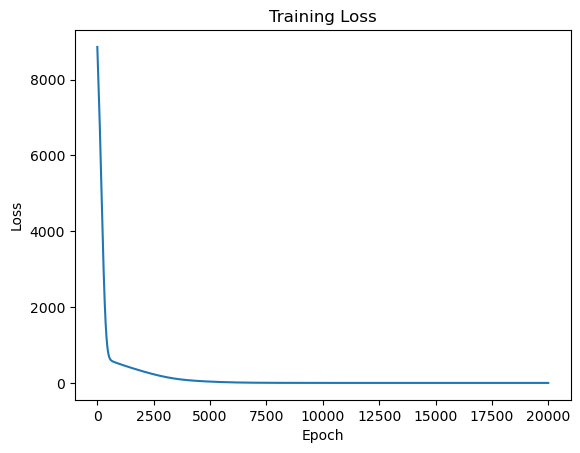

{'hidden.weight': tensor([[2.5098],
        [1.7157],
        [0.9765],
        [0.8836],
        [2.1655],
        [1.7942],
        [1.4316],
        [2.0308],
        [1.2968],
        [1.8808],
        [2.0597],
        [1.1336],
        [1.0563],
        [2.0612],
        [2.5320],
        [2.4662],
        [1.3596],
        [0.9028],
        [1.1625],
        [2.7079],
        [1.3814],
        [0.8523],
        [0.9257],
        [1.6698],
        [0.9223],
        [1.5491],
        [0.9074],
        [1.4733],
        [1.1013],
        [2.8038],
        [1.1562],
        [2.2843],
        [1.4681],
        [1.4976],
        [1.9755],
        [0.9237],
        [1.6083],
        [1.3777],
        [1.8752],
        [2.9490],
        [1.2770],
        [2.5143],
        [0.8015],
        [2.8576],
        [1.3891],
        [0.8989],
        [0.7980],
        [2.4781],
        [0.0000],
        [1.9084],
        [0.0000],
        [3.6293],
        [1.0506],
        [1.6942],
        [1

In [42]:
train_model(model_4,x_train_1,y_train_1,num_epochs,optimizer,device)
update_param_importance(dataloader_1)

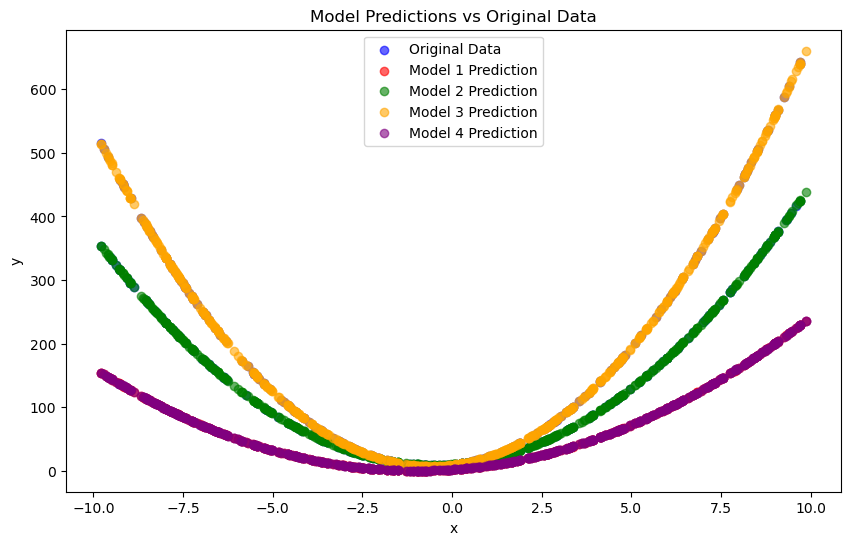

Model 1 MSE: 12799.3896
Model 2 MSE: 5197.4790
Model 3 MSE: 13238.3799
Model 4 MSE: 12799.4854


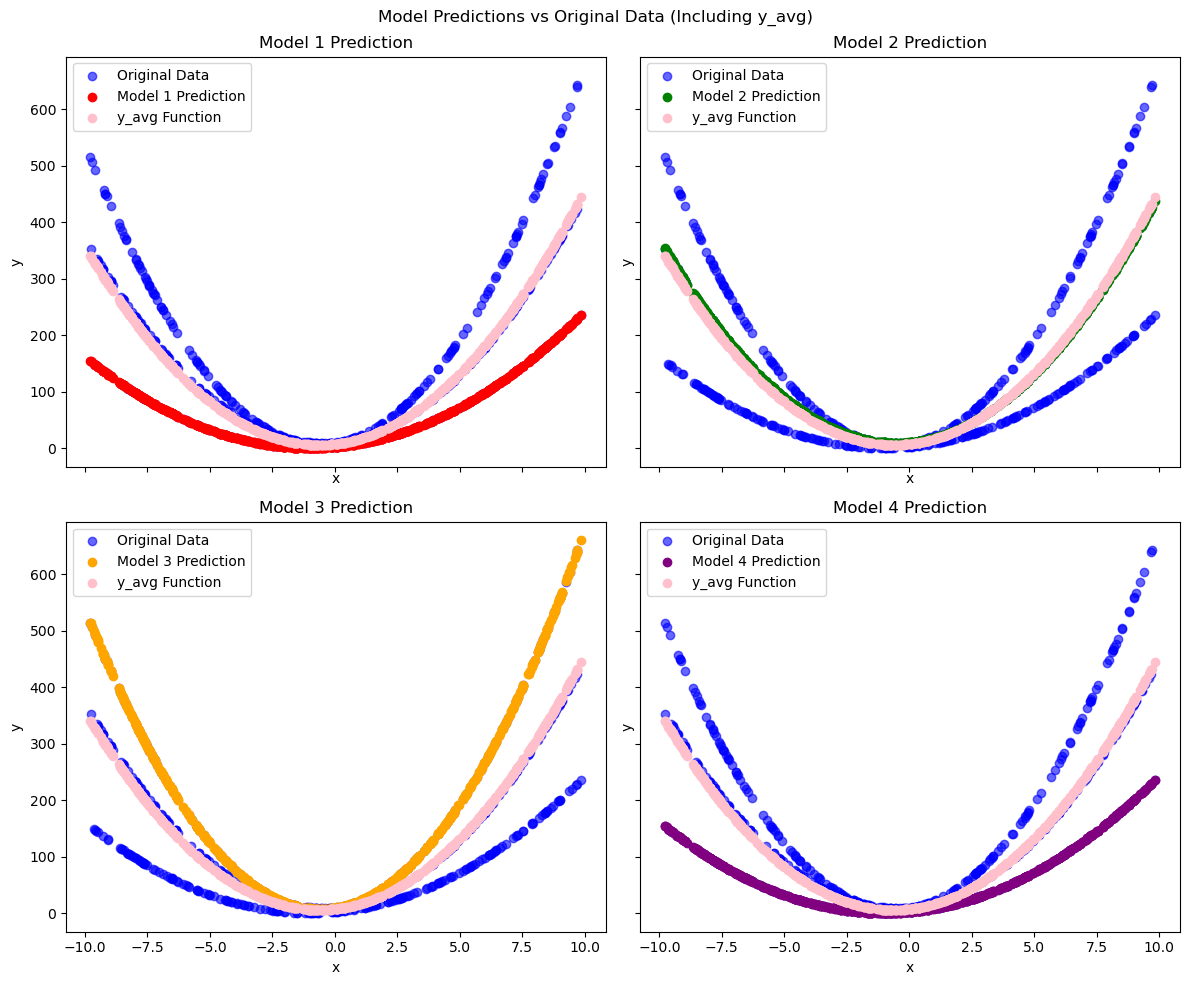

In [43]:
y_pred_1, y_pred_2, y_pred_3, y_pred_4 = evaluate_all(x_test, y_test , model_1, model_2, model_3, model_4)
plot_preds(x_test, y_test, y_pred_1, y_pred_2, y_pred_3, y_pred_4)
plot_preds_new(x_test, y_test, y_pred_1, y_pred_2, y_pred_3, y_pred_4)

Epoch [1000/20000], Loss: 889.6619

Epoch [2000/20000], Loss: 860.2984

Epoch [3000/20000], Loss: 837.3365

Epoch [4000/20000], Loss: 820.1136

Epoch [5000/20000], Loss: 807.5888

Epoch [6000/20000], Loss: 799.0336

Epoch [7000/20000], Loss: 793.7269

Epoch [8000/20000], Loss: 790.9597

Epoch [9000/20000], Loss: 789.9091

Epoch [10000/20000], Loss: 789.6862

Epoch [11000/20000], Loss: 789.6691

Epoch [12000/20000], Loss: 789.6689

Epoch [13000/20000], Loss: 789.6688

Epoch [14000/20000], Loss: 789.6689

Epoch [15000/20000], Loss: 789.6688

Epoch [16000/20000], Loss: 789.6697

Epoch [17000/20000], Loss: 789.6688

Epoch [18000/20000], Loss: 789.6690

Epoch [19000/20000], Loss: 789.6692

Epoch [20000/20000], Loss: 789.6689



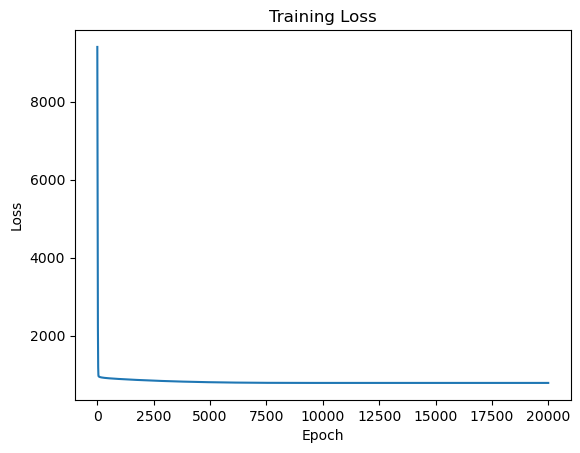

{'hidden.weight': tensor([[ 1130.3132],
        [  780.2382],
        [  654.2916],
        [ 1117.9293],
        [ 1406.7327],
        [ 1914.2747],
        [ 1022.6739],
        [10708.4883],
        [  883.6581],
        [ 2043.9833],
        [ 1041.9427],
        [ 1435.3864],
        [ 1286.5168],
        [ 2323.0771],
        [ 2808.2661],
        [ 2298.7563],
        [ 1638.0256],
        [ 1131.1105],
        [ 1407.8389],
        [ 2368.8257],
        [ 1635.8416],
        [ 1087.2773],
        [ 1153.9642],
        [ 1899.9652],
        [  765.0483],
        [  957.9775],
        [ 1142.1193],
        [ 1720.7806],
        [ 1333.4797],
        [ 1167.1871],
        [  914.1960],
        [ 2283.8745],
        [ 1081.0027],
        [  947.4739],
        [ 2151.5071],
        [ 1143.6405],
        [ 1045.9490],
        [  694.8558],
        [  907.5028],
        [ 2408.7498],
        [  701.0358],
        [ 2247.5940],
        [  703.7171],
        [ 1238.9426],
        [ 1742

In [44]:
train_model_with_custom_loss(model_4,x_train_2,y_train_2,num_epochs,optimizer,device)
update_param_importance(dataloader_2)

In [ ]:
y_pred_1, y_pred_2, y_pred_3, y_pred_4 = evaluate_all(x_test, y_test , model_1, model_2, model_3, model_4)
plot_preds(x_test, y_test, y_pred_1, y_pred_2, y_pred_3, y_pred_4)
plot_preds_new(x_test, y_test, y_pred_1, y_pred_2, y_pred_3, y_pred_4)

Epoch [1000/20000], Loss: 9286.6875

Epoch [2000/20000], Loss: 9286.6865

Epoch [3000/20000], Loss: 9286.6865

Epoch [4000/20000], Loss: 9286.6895

Epoch [5000/20000], Loss: 9286.6943

Epoch [6000/20000], Loss: 9286.6943

Epoch [7000/20000], Loss: 9286.6875

Epoch [8000/20000], Loss: 9286.7588

Epoch [9000/20000], Loss: 9286.6895

Epoch [10000/20000], Loss: 9286.6875

Epoch [11000/20000], Loss: 9286.6885

Epoch [12000/20000], Loss: 9286.6875

Epoch [13000/20000], Loss: 9286.6973

Epoch [14000/20000], Loss: 9286.6943

Epoch [15000/20000], Loss: 9286.6904

Epoch [16000/20000], Loss: 9286.7412

Epoch [17000/20000], Loss: 9286.6865

Epoch [18000/20000], Loss: 9286.6914

Epoch [19000/20000], Loss: 9286.6895

Epoch [20000/20000], Loss: 9286.7412



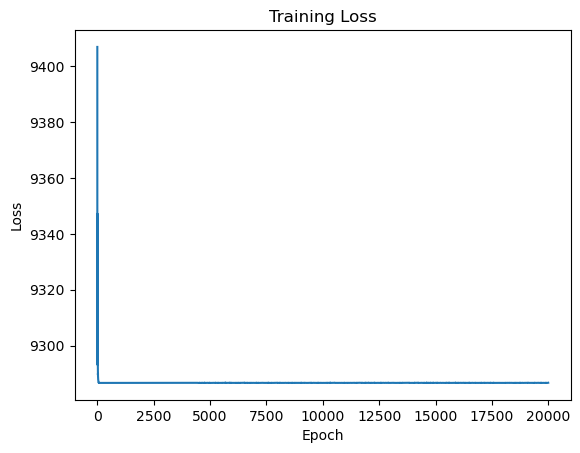

In [45]:
train_model_with_custom_loss(model_4,x_train_3,y_train_3,num_epochs,optimizer,device)

In [ ]:
y_pred_1, y_pred_2, y_pred_3, y_pred_4 = evaluate_all(x_test, y_test , model_1, model_2, model_3, model_4)
plot_preds(x_test, y_test, y_pred_1, y_pred_2, y_pred_3, y_pred_4)
plot_preds_new(x_test, y_test, y_pred_1, y_pred_2, y_pred_3, y_pred_4)